In [1]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.pipelines.controlnet.pipeline_controlnet_inpaint import *
from diffusers.utils import load_image

from ip_adapter import IPAdapter

from PIL import Image
import torch

import os

In [2]:
canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pose_controlnet = ControlNetModel.from_pretrained("models/cn_pose", torch_dtype=torch.float16)
segment_controlnet = ControlNetModel.from_pretrained("models/controlnet-seg-finetuned", torch_dtype=torch.float16)

controlnet = [canny_controlnet, pose_controlnet, segment_controlnet]

pipe = StableDiffusionControlNetInpaintPipeline.from_single_file(
    "C:/Users/tabatabaei/vision/models/realisticVisionV60B1_v51VAE-inpainting.safetensors",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    feature_extractor=None,
    safety_checker=None
)

pipe = pipe.to("cuda")

ip_model = IPAdapter(
    pipe, 
    'models/image_encoder/', 
    'models/ip-adapter_sd15.bin', 
    'cuda'
)

C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:387: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)
C:\Users\tabatabaei\vision\diffusers\src\diffusers\models\lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that 

In [3]:
text_prompt = "high quality detailed photograph of a woman standing"
negative_prompt = "poor quality, bad, worst, unnatural, patched, cropped, flat, unrealistic, fade, Disfigured, cartoon, blurry, nude"

In [4]:
new_size = (512, 512)

result_dir = "C:/Users/tabatabaei/Desktop/metric dataset/results"
mask_dir = "C:/Users/tabatabaei/Desktop/metric dataset/mask"
distorted_dir = "C:/Users/tabatabaei/Desktop/metric dataset/distorted"
canny_dir = "C:/Users/tabatabaei/vision/dataset/VTON-HD/test/canny"
segment_dir = "C:/Users/tabatabaei/vision/dataset/VTON-HD/test/image-parse-v3"
pose_dir = "C:/Users/tabatabaei/vision/dataset/VTON-HD/test/openpose_img"
reference_dir = "C:/Users/tabatabaei/vision/dataset/VTON-HD/test/cloth"

In [12]:
for root, _, files in os.walk(mask_dir):
    for file_name in files:
        msk_img = load_image(os.path.join(mask_dir, file_name)).resize(new_size)
        dst_img = load_image(os.path.join(distorted_dir, file_name[:17] + '.png')).resize(new_size)
        cny_img = load_image(os.path.join(canny_dir, file_name[:8] + '.jpg')).resize(new_size)
        seg_img = load_image(os.path.join(segment_dir, file_name[:8] + '.png')).resize(new_size)
        pos_img = load_image(os.path.join(pose_dir, file_name[:8] + '_rendered.png')).resize(new_size)
        rfc_img = load_image(os.path.join(reference_dir, file_name[:8] + '.jpg')).resize(new_size)

        generated_image = ip_model.generate(
            pil_image=rfc_img,
            prompt=text_prompt,
            negative_prompt=negative_prompt,
            image=dst_img,
            mask_image=msk_img,
            control_image=[cny_img, pos_img, seg_img],
            num_inference_steps=30,
            controlnet_conditioning_scale = [0, 0.7, 0.9],
            strength=1.0,
            num_samples=1,
            width=384, 
            height=512
        )[0]

        generated_image.save(os.path.join(result_dir, file_name))


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

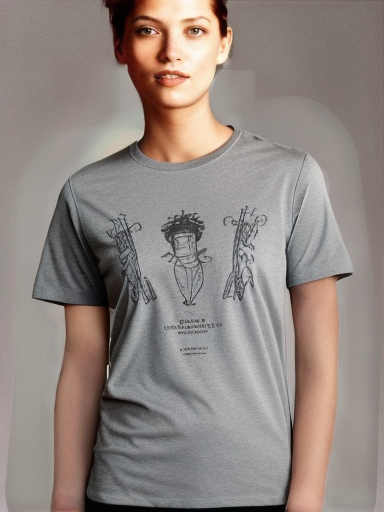

In [142]:
file_name = '04611_00_04611_00_0.jpg'

msk_img = load_image(os.path.join(mask_dir, file_name)).resize(new_size)
dst_img = load_image(os.path.join(distorted_dir, file_name[:17] + '.png')).resize(new_size)
cny_img = load_image(os.path.join(canny_dir, file_name[:8] + '.jpg')).resize(new_size)
seg_img = load_image(os.path.join(segment_dir, file_name[:8] + '.png')).resize(new_size)
pos_img = load_image(os.path.join(pose_dir, file_name[:8] + '_rendered.png')).resize(new_size)
rfc_img = load_image(os.path.join(reference_dir, file_name[:8] + '.jpg')).resize(new_size)

generated_image = ip_model.generate(
    pil_image=rfc_img,
    prompt=text_prompt,
    negative_prompt=negative_prompt,
    image=dst_img,
    mask_image=msk_img,
    control_image=[cny_img, pos_img, seg_img],
    num_inference_steps=30,
    controlnet_conditioning_scale = [0.0, 0.2, 0.2],
    scale=1.0,
    seed=11,
    strength=1.0,
    num_samples=1,
    width=384, 
    height=512
)[0]

generated_image.save(os.path.join(result_dir, file_name))

generated_image

In [143]:
import tqdm

In [144]:
from controlnet_aux.processor import Processor
from diffusers.utils import load_image

# options are:
# ["canny", "depth_leres", "depth_leres++", "depth_midas", "depth_zoe", "lineart_anime",
#  "lineart_coarse", "lineart_realistic", "mediapipe_face", "mlsd", "normal_bae", "normal_midas",
#  "openpose", "openpose_face", "openpose_faceonly", "openpose_full", "openpose_hand",
#  "scribble_hed, "scribble_pidinet", "shuffle", "softedge_hed", "softedge_hedsafe",
#  "softedge_pidinet", "softedge_pidsafe", "dwpose"]

def controlnet_condition(img, processor_id):
    processor = Processor(processor_id)

    processed_image = processor(img, to_pil=True)
    return processed_image

c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\mediapipe_face\mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\tabatabaei\miniconda3\envs\vision\lib\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflic

In [148]:
warp_directory = "C:/Users/tabatabaei/Desktop/cn_canny/image"
canny_directory = "C:/Users/tabatabaei/Desktop/cn_canny/canny"

In [149]:
import os

for root, _, files in os.walk(warp_directory):
    for file_name in files:
        canny_image = controlnet_condition(
            load_image(os.path.join(root, file_name)), 
            "canny"
        )
        canny_image.save(os.path.join(canny_directory, file_name))